<center> <h2> DS 3000 - Spring 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Analysis of Yelp Businesses and User Reviews

</h3> </center>
<center><h4>Noah Skelton, Elizabeth Ronan, Jalaj Singh, Matthew Spooner</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

**Executive Summary:**
 
We analyzed data taken from Yelp to find trends that impact good and bad reviews. We used machine learning algorithms to predict the sentiment of the review text. Additionally we conducted an independent samples t-test and an ANOVA test to determine the effect of user review count on their overall "usefulness". 
 
**Method:** Our dataset consists of 3 columns which we focus on. The stars, text, number of 'useful' left on a review. Using this dataset, we tested a hypothesis about the number of reviews impacting the number of 'useful''s a review receives. We also used the dataset to predict the sentiment of a review from the text column. 
 
**Results:** During the hypothesis testing we found that, while assumptions for our tests were not quite met, we observed significant differences in the average "useful" rating of users with a large number of reviews compared to those with few. In particular, we saw in our t-test that those with > 25 reviews had a typically higher average "usefulness" than those with < 25 reviews. Additionally, in our ANOVA we saw that those with > 14 reviews had a higher "usefulness" than those in groups of 1-2 reviews, and 3-14 reviews. 
After features extraction, we found that key words like "wait", "place" , "service" were the most important to a review. Our machine learning models predicted sentiment with great accuracy, with LSV and Logistic regression both receiving an approximately 91% accuracy.
 
**Discussion:** For the future, we would like to run this analysis on a larger dataset that is more balanced i.e. does not contain a substantially large amount of positive reviews. A more precise analysis could involve predicting star rating instead of 'positive' vs 'negative' sentiment of reviews.

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

**Problem Statement**
 
In this project, we are analyzing yelp reviews to determine what factors about the business or the user posting the review influence positively or negatively the review's rating on yelp. We want to know if the number of reviews a user has left impacts the 'usefulness' of their reviews. We also want to find some key words that are in negative vs positive ratings. Lastly, we want to compare several machine learning algorithms to classify the sentiment of the text of each review and determine which machine learning algorithm works best for the dataset. Ultimately, we want to be build a machine learning model that can accurately predict the sentiment of reviews and that can be used later on to reveal key aspects that drive a customer's perception and feelings towards a restaurant. 
 
 
**Significance of the Problem**
 
Yelp reviews are very impactful on how a business performs, and analyzing trends to determine the most common flaws in restaurants can reduce these concerns in the future. Consumers use yelp to determine where to eat, what dish to order, what venue to use for events, and much more. Analyzing yelp reviews can help businesses figure out what changes to make to their service. Additionally, by determining what attributes are most liked in high scoring reviews, a business can determine which things to focus on more. Determining trends among users can also help determine which reviews that business should focus on. Analyzing text and extracting meaning from the thousands of reviews users have left can provide businesses valuable insights that can't be determined by simply scrolling through Yelp. Yelp has published this dataset online for anyone to use for learning. As a result there has been plenty of previous work done on this topic. A project published on kaggle used Classification and Regression Trees (CART) to build a model for sentiment analysis of reviews. They used cross-validation on a larger version of the orignal sample of the dataset we used. Additonally, the authors created a Document Term Matrix and removed infrequent terms for the features in the model. Their model had an 86% test-set accuracy (1). Another project used Multinomial Naive Bayes to classify sentiment of reviews. They used a CountVectorizer approach to create features out of the text and utilized the same dataset as the kaggle project. Their model achieved an accuracy of 92% on the test-set (2).

1. https://www.kaggle.com/suzanaiacob/sentiment-analysis-of-the-yelp-reviews-data
2. https://medium.com/@urytrayudu1/sentiment-analysis-for-yelp-review-classification-54b65c09ff7b
 
 
**Questions/Hypothesis**
 
In this project, we sought to answer the following questions related to yelp reviews:
* Does the amount of reviews a user has left impact the ‘usefulness’ of their ratings?
* What are the key words for positive vs negative reviews that a business could use to improve?
* Which machine-learning algorithm will lead to the best prediction of sentiment from a textual review?
 
We hypothesize that the more reviews that a user has left before, the more "useful" likes their reviews will get. More experienced yelp users will have higher rated reviews. Additionally, we believe that words like "rude" vs "friendly" and "dirty" vs "clean" will be important in negative vs positive reviews as cleanliness and appearance is a big factor in user experience. Lastly, we hypothesize the Linear Support Vector classifier algorithm will lead to the best prediction of sentiment from a review because it will scale very well to our large and high-dimensional dataset.

 

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

We obtained our data originally off of https://www.kaggle.com/yelp-dataset/yelp-dataset/version/6, however we quickly realized that the files here were far too large to be of use (how can we use a file we can't even open), so we went looking more on Kaggle and found this user who uploaded a shortened reviews file with only 10,000 reviews (https://www.kaggle.com/omkarsabnis/yelp-reviews-dataset). We downloaded the csv from there, and uploaded it to a github repository for easy access. This dataset has 10 columns, of which we will mainly be focusing on 3 (stars, text, useful). The stars shows how many stars the user rated that business, the text is the actual review they left, and useful are upvotes from other users on the usefulness of the review itself. Our user data was pulled from the original kaggle source, and we used python code in an external document to cut it down to the first 10,000 users so that we could upload the csv to github and import it to this file. 


### 2.2. Variables
**IVs and DVs for Hypothesis**

The more reviews a user has left before leads to higher "useful" likes on their reviews
  * IV: the # of reviews a user has made all-time
  * DV: total # of "useful" likes on their reviews all-time


**Features and Target Variables for Predictive Models**

For our predictive models, the text from the reviews will ultimately make up our feature variables. We will use feature engineering to determine which words in the reviews are most important, and thus in the process, answer our question about key-words in negative vs positive reviews. Our target variables will be a positive or negative sentiment.






### 2.3. Data Analysis

In our predictive model, we will be predicting the sentiment for a review from the feature variables derived from the text of the review. 

This will be done using supervised learning, as all of our data is well-labeled (each review has a star-rating which we will convert to a positive and negative sentiment). 1-2 star reviews will represent negative sentiment, while 4-5 star review will represent postive sentiment. We choose to ignore 3 star reviews since we are focusing on only predicting positive and negative sentiment, and 3 star reviews would represent a neutral one. More importantly, 3 star reviews are likely to contain words that are both postivie and negative, and this could hurt our model's accuracy. 

Our goal is to perform sentiment analysis classification here and try to classify reviews into positive or negative sentiments. Our feature variables are word frequencies represented as tf-idf (term frequency–inverse document frequency), and our target variable is a 'positive' or 'negative' sentiment. As we determine which features are more important, we hope to answer our question about key words in negative vs positive reviews as well.  

We will be using several machine learning algorithms, including Mulitnomial Naive Bayes, Linear Support Vector, Multilayer Perceptron, and Logisitc Regression in order to see which one is better in creating more accurate sentiment analysis for the reviews. We chose these three as they are commonly used classification algorithms, and we want to find the best one.


**Multinomial Naive Bayes**

Multinomial Naive Bayes is suitable for classification with discrete features. In our case, the basic idea of this technique is to find the probabilities of sentiments assigned to texts by using the joint probabilities of words and sentiments. While it makes the naïve assumption that all of our features are conditionally independent, MNB is also easy to understand and will work well with our high-dimensional data

**Linear Support Vector (Support Vector Machine)**

The support vector machine finds hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies the data points. Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. The dimension of the hyperplane depends upon the number of features. The hyper plane is a line for 2-dimensional sets (2 feature variables), a plane for 3-dimensional sets etc. SVM scales very well to large datasets, gives fast predictions, and is simple and easy to train, which will be effective on our high-dimensional and large dataset.

**Multilayer Perceptron**

A multilayer perceptron (MLP) is a deep, artificial neural network. It is composed of more than one perceptron. They are composed of an input layer to receive the signal, an output layer that makes a decision or prediction about the input, and in between those two, an arbitrary number of hidden layers that are responsible for most of the computation. Given a set of features and a target, it can learn a non-linear function approximator for classification. While MLP works best with more data points and can give fast predictions once properly trained, it can be computationally very expensive and time consuming to train. Furthermore, we cannot know how much each independent variable is influencing the dependent variables. Regardless, we chose MLP because it is well suited for our complex dataset.

**Logistic Regression**

Logistic regression compresses a linear function so that is limited to the range [0,1]. The output value is interpreted as the conditional probability of the input instance belonging to the positive class, given its feature. Logistic regression is easy to implement, interpret and very efficient to train. It, also, will work very well on our high dimensional dataset.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling



The review data we got from the kaggle dataset is already cleaned and does not contain any NA or null values

In [1]:
import urllib.request
import zipfile
import pandas as pd
# reads in both the user and review data and puts them in the appropriate dataframes
urlReview='https://github.com/nodask0/DataScienceYelp/raw/master/yelp_data.csv'
urlUser='https://github.com/nodask0/DataScienceYelp/raw/master/users.csv'

reviewDF = pd.read_csv(urlReview)
userDF = pd.read_csv(urlUser)
reviewDF = reviewDF.drop(columns = ["business_id", "date", "review_id", "type", "user_id"])
userDF = userDF.drop(userDF.columns[0], axis=1)
userDF = userDF.drop(columns = ["name", "yelping_since", "friends", "fans", "elite", "compliment_hot", "compliment_more", "compliment_profile", "compliment_cute", "compliment_list", "compliment_note", "compliment_plain", "compliment_cool", "compliment_funny", "compliment_writer", "compliment_photos"])
star_groups = reviewDF.groupby("stars")
#creates individual tables for each star rating for further analysis
one_star, two_star, three_star, four_star, five_star = [[star_groups.get_group(x) for x in star_groups.groups][i] for i in range(5)]
userDF

,user_id,review_count,useful,funny,cool,average_stars
0,JJ-aSuM4pCFPdkfoZ34q0Q,10,0,0,0,3.70
1,uUzsFQn_6cXDh6rPNGbIFA,1,0,0,0,2.00
2,mBneaEEH5EMyxaVyqS-72A,6,0,0,0,4.67
3,W5mJGs-dcDWRGEhAzUYtoA,3,0,0,0,4.67
4,4E8--zUZO1Rr1IBK4_83fg,11,4,0,0,3.45
...,...,...,...,...,...,...
9995,kk9v5fcYH0zpOUCIff5mtw,2,2,0,0,2.00
9996,we-YjXv8QrcblgkmSjtpCA,17,0,0,0,2.88
9997,G0hn6QE38a47UzLWK2rbdg,5,0,0,2,5.00
9998,MUC2FuDPNuJjFb2yF4US1w,6,0,0,0,4.33


In [0]:
userDF["average_useful"] = userDF["useful"] / userDF["review_count"]

groupedBy25 = userDF.groupby(userDF["review_count"] < 25)["average_useful"].agg(["count", "mean", "std", "sem"])
groupedBy25.rename(index ={False:"Over 25", True:"Under 25"}, inplace = True)
groupedBy25


,count,mean,std,sem
review_count,,,,
Over 25,2466,0.868495,2.809552,0.056577
Under 25,7529,0.432152,2.255114,0.025990


In [0]:
over25, under25 = [x for _, x in userDF.groupby(userDF['review_count'] < 25)]
over25 = over25.drop(columns = ["funny", "useful", "cool", "average_stars"]).dropna()
over25

,user_id,review_count,average_useful
18,jYnkJR3T8yCERXywoVhWYA,48,0.312500
44,fV8Yr0c5tFQTQ2SRRJHXHw,50,0.860000
52,bZkZgll3Fii18x3WRtB5Lg,62,0.000000
74,aw973Pm1nrTbRjP4zY9B9g,762,0.228346
76,B46q0uJGiuzTtcYXknkgcQ,83,0.000000
...,...,...,...
9982,gdE08fH1krgdIykCyWUj1A,52,0.192308
9983,OiuhFbxVZbsenb14ZEsMJA,31,0.935484
9985,_MRSCSwIlvr1_VOmfNmq0w,65,0.123077
9988,NcVpw2ppw-olEMyBde5JCg,40,0.025000


In [0]:
under25 = under25.drop(columns = ["funny", "useful", "cool", "average_stars"]).dropna()
under25

,user_id,review_count,average_useful
0,JJ-aSuM4pCFPdkfoZ34q0Q,10,0.000000
1,uUzsFQn_6cXDh6rPNGbIFA,1,0.000000
2,mBneaEEH5EMyxaVyqS-72A,6,0.000000
3,W5mJGs-dcDWRGEhAzUYtoA,3,0.000000
4,4E8--zUZO1Rr1IBK4_83fg,11,0.363636
...,...,...,...
9995,kk9v5fcYH0zpOUCIff5mtw,2,1.000000
9996,we-YjXv8QrcblgkmSjtpCA,17,0.000000
9997,G0hn6QE38a47UzLWK2rbdg,5,0.000000
9998,MUC2FuDPNuJjFb2yF4US1w,6,0.000000


In [0]:
over14, under15 = [x for _, x in userDF.groupby(userDF['review_count'] < 15)]
over2under15, under3 = [x for _, x in under15.groupby(under15['review_count'] < 3)]
def groupBy3Or15(numReviews):
    if(numReviews < 3):
        return "Under 3"
    elif(numReviews < 15):
        return "Over 2 Under 15"
    else:
        return "Over 14"
    
userDF["under3or15"] = userDF["review_count"].map(groupBy3Or15)
    
groupedBy3_15 = userDF.groupby("under3or15")["average_useful"].agg(["count", "mean", "std", "sem"])
groupedBy3_15.reset_index(inplace = True)
groupedBy3_15

,under3or15,count,mean,std,sem
0,Over 14,3361,0.800551,3.103769,0.053537
1,Over 2 Under 15,3704,0.421499,1.682726,0.027649
2,Under 3,2930,0.390273,2.255146,0.041662


In [0]:
reviewDF  

,stars,text,cool,useful,funny
0,5,My wife took me here on my birthday for breakf...,2,5,0
1,5,I have no idea why some people give bad review...,0,0,0
2,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0
...,...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,1,2,0
9996,4,Should be called house of deliciousness!\n\nI ...,0,0,0
9997,4,I recently visited Olive and Ivy for business ...,0,0,0
9998,2,My nephew just moved to Scottsdale recently so...,0,0,0


In [2]:
# remove columns with 3 stars
reviewDF = reviewDF[reviewDF.stars != 3]
reviewDF

,stars,text,cool,useful,funny
0,5,My wife took me here on my birthday for breakf...,2,5,0
1,5,I have no idea why some people give bad review...,0,0,0
2,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0
...,...,...,...,...,...
9994,5,Let's see...what is there NOT to like about Su...,1,2,1
9996,4,Should be called house of deliciousness!\n\nI ...,0,0,0
9997,4,I recently visited Olive and Ivy for business ...,0,0,0
9998,2,My nephew just moved to Scottsdale recently so...,0,0,0


In [3]:
# classify 4 and 5 stars reviews as positive and 1 and 2 star(s) reviews as negative
reviewDF["sentiment"] = reviewDF["stars"].apply(lambda row: "positive" if row > 3 else "negative")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [4]:
features = reviewDF["text"]
features

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9994    Let's see...what is there NOT to like about Su...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 8539, dtype: object

In [5]:
target = reviewDF["sentiment"]
target

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
9994    positive
9996    positive
9997    positive
9998    negative
9999    positive
Name: sentiment, Length: 8539, dtype: object

### 3.2. Data Exploration



Here are two visualizations - first we have the scatterplot of the under-25 review users vs. average number of useful votes, and second is the same scatterplot for over-25 review users.

In [0]:
over25, under25 = [x for _, x in userDF.groupby(userDF['review_count'] < 25)]
over25 = over25.drop(columns = ["funny", "useful", "cool", "average_stars"]).dropna()
under25 = under25.drop(columns = ["funny", "useful", "cool", "average_stars"]).dropna()

In [0]:
import plotly.express as px
underFig = px.scatter(under25, x="review_count", y="average_useful")
underFig.show()

<center> <img src="https://github.com/nodask0/DataScienceYelp/blob/master/under25Graph.png?raw=true"> </center>


Here we can see that the vast majority of under-25 review users have an average useful rating of less than 20, with very few actually breaking the 20 vote mark.

In [0]:
overFig = px.scatter(over25, x="review_count", y="average_useful")
overFig.show()

<center> <img src="https://github.com/nodask0/DataScienceYelp/blob/master/under25Graph.png?raw=true"> </center>

For the over-25 graph we see that it is very clustered towards the left of the graph - meaning most of the users have between 25 and 500 reviews. As with the previous graph there are relatively few reviewers with a high-average useful rating.

In [0]:
groupedBy25["review_count"] = groupedBy25.index
graph = px.bar(groupedBy25, x = "review_count", y = "mean", error_x = "sem", error_y = "sem", template='none', width=500, 
                labels = {"mean": "Average Useful Votes per Review", "review_count": "Group"})

graph.update_traces(marker_color="#FFF")
graph.update_traces(marker= dict(line={"width":3,"color":"#000000"}))

graph.update_xaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
graph.update_yaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})


graph.show()

<center> <img src="https://github.com/nodask0/DataScienceYelp/blob/master/25splitbar.png?raw=true"> </center>

Based exclusively off this bar chart, it is evident that the over-25 group has a higher average number of useful votes, however we still need to conduct our t-test to determine if this difference is significant.

We will also conduct a one-way ANOVA test on roughly thirds of the user review dataset. Here are the scatter plots of those groups.

In [0]:
over14Fig = px.scatter(over14, x="review_count", y="average_useful")
over14Fig.show()

<center> <img src="https://github.com/nodask0/DataScienceYelp/blob/master/over14graph.png?raw=true"> </center>

This figure is very similar to our >25 review count group from the previous test, the only difference is this group includes users with 15-25 reviews as well. 

In [0]:
over2Under15Fig = px.scatter(over2under15, x="review_count", y="average_useful")
over2Under15Fig.show()

<center> <img src="https://github.com/nodask0/DataScienceYelp/blob/master/over2under15graph.png?raw=true"> </center>

It is evident from this scatter plot that this group will certainly have a low average number of useful votes given that most of the values are below 5 on the y-axis. 

In [0]:
under3Fig = px.scatter(under3, x="review_count", y="average_useful")
under3Fig.show()

<center> <img src="https://github.com/nodask0/DataScienceYelp/blob/master/under3graph.png?raw=true"> </center>

Unfortunately not much can be gleaned from this plot, as we only have 2 values for number of reviews (1 and 2), and most of the values are so close together we cannot really see anything here.

In [0]:
graphAnova = px.bar(groupedBy3_15, x = "under3or15", y = "mean", error_x = "sem", error_y = "sem", template='none', width=500, 
                labels = {"mean": "Average Number of Useful Votes", "under3or15": "Group"})

graphAnova.update_traces(marker_color=["#d3d3d3", "#FFF", "#FFF"])
graphAnova.update_traces(marker= dict(line={"width":3,"color":"#000000"}))

graphAnova.update_xaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
graphAnova.update_yaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})


graphAnova.show()

<center> <img src="https://github.com/nodask0/DataScienceYelp/blob/master/3and15splitbar.png?raw=true"> </center>

Going off of this bar chart, as with the previous one, it is clear that the group with the most reviews has a much higher average number of useful votes. However, we will still need to perform the ANOVA to see if these differences are significant.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0.98, 'Number of review by stars')

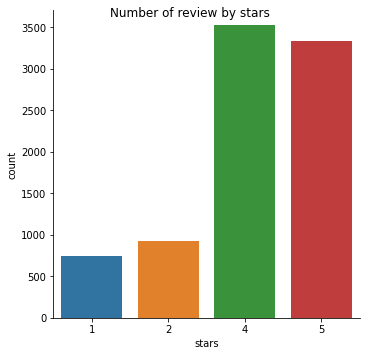

In [0]:
ax1 = sns.catplot(x="stars", kind="count", data=reviewDF);
ax1.fig.suptitle("Number of review by stars")

<center> <img src="https://github.com/nodask0/DataScienceYelp/blob/master/ax1.png?raw=true"> </center>

Text(0.5, 0.98, 'Sentiment of reviews')

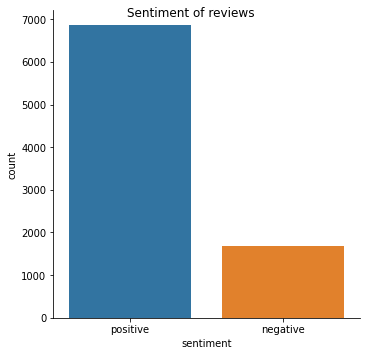

In [0]:
ax2 = sns.catplot(x="sentiment", kind="count", data=reviewDF);
ax2.fig.suptitle("Sentiment of reviews")

<center> <img src="https://github.com/nodask0/DataScienceYelp/blob/master/ax2.png?raw=true"> </center>

The above graphs provides a breakdown of the number of reviews in our dataset by the star rating and sentiment. There are clearly more positive (4-5 star) than negative (1-2 star)  reviews. This will most likely create a positive bias in our model.

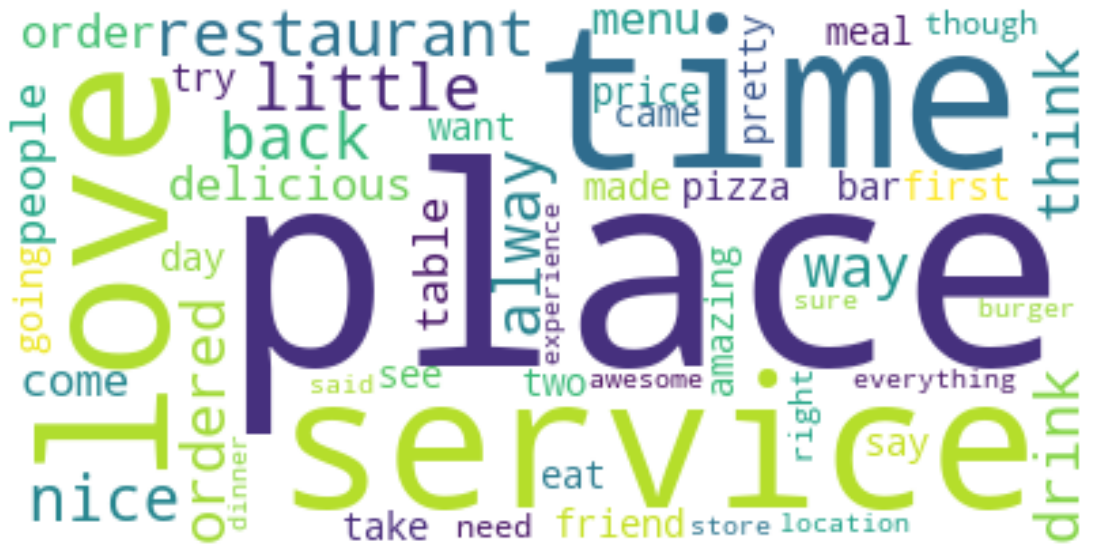

In [0]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
# excluding words that could apply to both sentiments or are not useful
stopwords.update(["food", "make", "good", "one", "great", "really", "even", "will", "go", "not", "much", "best", "know", "thing", "still", "lot", "went", "got", "well", "now", "us", "never", "better"])
text = " ".join(review for review in reviewDF["text"])
wc=WordCloud(stopwords = stopwords, background_color = "white", max_words = 50).generate(text)

plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

<center> <img src="https://github.com/nodask0/DataScienceYelp/blob/master/wordcloud.png?raw=true"> </center>

The above is a word cloud of the text from all of the reviews. Larger words have a higher frequency in reviews. It appears that the key words that we will find through our tf-idf feature extraction will most likely be related to location, time and service. 

### 3.3. Model Construction

### Indpendent samples t test <br>

Let x1 = the average number of useful votes for users with > 25 reviews. <br>
Let x2 = the average number of useful votes for users with < 25 reviews. <br>
H0: x1 = x2 <br>
H1: x1 > x2

In [0]:
from scipy import stats
avgUsefulOver = over25["average_useful"].dropna()
avgUsefulUnder = under25["average_useful"].dropna()
results = stats.ttest_ind(avgUsefulOver, avgUsefulUnder)
df = len(avgUsefulOver) + len(avgUsefulUnder) - 2
tstat = results[0]
pvalue = results[1]
print("t-statistic = ", tstat)
print("p-value = ", format(pvalue, '.10f'))
print("Degrees of Freedom =", df)

t-statistic =  7.823571959735522
p-value =  0.0000000000
Degrees of Freedom = 9993


In [0]:
levene_results = stats.levene(avgUsefulOver, avgUsefulUnder)
levene_results

LeveneResult(statistic=42.84178635294568, pvalue=6.226313913233459e-11)

In [0]:
shapiro_results = stats.shapiro(userDF["average_useful"].dropna())
shapiro_results

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.18660396337509155, 0.0)

### ANOVA test
We also performed an ANOVA test splitting the dataset roughly into thirds based on total number of reviews.

H0: There is no difference in average useful votes between the three groups<br>
H1: At least one of the groups has a significantly different average useful votes than another

In [0]:
under3Avg = under3["average_useful"].dropna()
over2under15Avg = over2under15["average_useful"].dropna()
over14Avg = over14["average_useful"].dropna()

anovaResults = stats.f_oneway(over14Avg, over2under15Avg, under3Avg)
fstat = anovaResults[0]
pval = anovaResults[1]
df1 = len(groupedBy3_15) - 1
df2 = (len(under3Avg) - 1) + (len(over2under15Avg) - 1) + (len(over14Avg) - 1)
print("f-statistic =", fstat)
print("p-value =", pval)
print("df1 =", df1, "| df2 =", df2)

f-statistic = 29.921481101079262
p-value = 1.106686192948547e-13
df1 = 2 | df2 = 9992


In [0]:
levene_resultsAnova = stats.levene(over14Avg, over2under15Avg, under3Avg)
levene_resultsAnova

LeveneResult(statistic=21.79025579963959, pvalue=3.607362691067226e-10)

In [0]:
shapiro_over14 = stats.shapiro(over14Avg)
print("Shapiro over 14 =", shapiro_over14)
shapiro_over2under15 = stats.shapiro(over2under15Avg)
print("Shapiro over 2 under 15 =", shapiro_over2under15)
shapiro_under3 = stats.shapiro(under3Avg)
print("Shapiro under 3 =", shapiro_under3)

Shapiro over 14 = (0.20330214500427246, 0.0)
Shapiro over 2 under 15 = (0.22666120529174805, 0.0)
Shapiro under 3 = (0.14259755611419678, 0.0)


In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
userDF = userDF.dropna()

mc = MultiComparison(userDF["average_useful"], userDF["under3or15"])

tukey_result = mc.tukeyhsd()
 
print(tukey_result)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------
        Over 14 Over 2 Under 15  -0.3791 0.001 -0.5133 -0.2448   True
        Over 14         Under 3  -0.4103 0.001 -0.5527 -0.2678   True
Over 2 Under 15         Under 3  -0.0312 0.843 -0.1706  0.1081  False
---------------------------------------------------------------------


### Machine Learning Model Construction


We need to transform our textual data so that it can be represented in  quantitative terms

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# transform the textual data to features represented as tf-idf frequencies
vect = TfidfVectorizer(stop_words = "english", min_df = 2).fit(features.values)
bag_of_words = vect.transform(features.values)
feature_names = vect.get_feature_names()
print("Number of features: ", len(vect.get_feature_names()))
key_words_df = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
key_words_df["text"] = features.values
key_words_df.set_index("text", inplace=True)

# sum the tf-idf frequencies of all of features we derived from the reviews
sum_df = key_words_df.sum(axis = 0, skipna = True)
sum_df.sort_values(ascending = False, inplace = True)

# return the words with the 50 highest total frequencies
sum_df[:50]


Number of features:  14611


great         279.448095
food          278.139948
good          274.525034
place         271.121472
like          184.743676
service       181.332585
just          173.380443
love          161.456126
time          156.105737
really        151.486926
ve            136.730027
best          134.790386
nice          125.995208
don           115.939623
friendly      112.908832
staff         109.086796
chicken       108.196564
little        108.021443
pizza         107.467502
delicious     102.273016
restaurant    101.388650
try            99.411421
pretty         95.059009
got            94.876291
menu           93.405496
bar            93.127507
better         89.569175
lunch          88.835419
amazing        87.856313
people         87.678735
ordered        86.769296
order          86.083429
fresh          85.864829
salad          84.939081
went           84.777864
going          84.222502
make           83.130151
night          82.159757
definitely     81.369651
know           80.930238


We use TfidfVectorizer to extract features from our text. It converts a collection of raw documents to a matrix of TF-IDF features. Which allows us to weight words based on how important they are to a string. High weight is given to words that appear often in a particular string but don't appear often across all strings. 

We summed the frequencies of particular words and found the 50 most important words based off tf-idf. Using these weights, we can  help determine which words are important and common in reviews. While there are some words above that are not that useful for analysis, focusing on the key words shows what factors were important when the user made the review. The results here are very similar to our word cloud which counted words and did not use tf-idf.

Additionally, these 50 word show the positive bias our model has, as there are many words with positive connations and virtually none with negative ones.

Now, we train and construct our model for sentiment analysis.

In [0]:
from sklearn.model_selection import train_test_split

# Split data set into training and testing (75% / 25%)
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=9000)
# Of the 75% allocated to training, 75% will be used for training the model, 25% as validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=9000)

In [0]:
#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", min_df = 5, ngram_range=(1, 2)).fit(X_train)


#encode the words in X_train, X_val, and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)
X_test_vectorized = vect.transform(X_test)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# create dictionary object with three classifiers
models = {
    "Multinomial Naive Bayes" : MultinomialNB(),
    "Linear Support Vector" : LinearSVC(random_state=9000, max_iter=1000000),
    "Multilayer Perceptron" : MLPClassifier(random_state=9000),
    "Logistic Regression"   : LogisticRegression(max_iter=1000000)
}

In [0]:
# Train each model on the vectorized training data
for model_name, model in models.items():
  model.fit(X=X_train_vectorized, y=y_train)

### 3.4. Model Evaluation


### Analysis of our independent samples t-test:

Assumptions of normality, as assessed by Shapiro-Wilk's test and homogeneity (equality) of variances, as assessed by Levene's test were not met. Despite this, we still performed the t-test in order to see if the means are close to the same. 

An independent sample t-test was conducted to compare the average number of useful votes for users with fewer than 25 reviews to users with greater than 25 reviews. Results from the t-test showed a statistically significant difference between the two groups t(9993) = 7.82, p < 0.00001. After examining the descriptive data we can see that users with more than 25 reviews averaged about 0.87 useful votes per review with a sample size of 2466 and a standard error of 0.056, while those with fewer than 25 reviews averaged about 0.43 useful votes per review, with a sample size of 7529 and a standard error of 0.026. 

These results indicate that the more reviews you leave, the more likely you are to be voted as "useful" by other users. 

### Analysis of our ANOVA test:

As with the independent sample t-test previously, assumptions of normality, as assessed by Shapiro-Wilk's test and homogeneity (equality) of variances, as assessed by Levene's test were not met for this ANOVA analysis. Despite this, we still performed the ANOVA test.

A one-way analysis of variance (ANOVA) was conducted to compare the average number of useful votes per user with fewer than 3, fewer than 15 and more than 2, and greater than 14 reviews each (each of these groups make up roughly 1/3 of the dataset). 

Results revealed a statistically significant difference among the three groups, F(2, 9992) = 29.92, p < .00001. <br>

Post-hoc comparisons using the Tukey test indicated that the average number of useful votes for the over-14 review group (M = 0.80, SE = 0.053) was significantly greater than the average number of useful votes for the over-2 under-15 group (M = 0.42, SE = 0.027) and under-3 group (M = 0.39, SE = 0.041). The over-2 under-15, and under-3 groups did not significantly differ from each other in the number of average useful votes. <br>

These results indicate, similarily to the t-test, that the more reviews you leave, the more likely you are to be voted as "useful" by other users. This is not linear, however, as there is no statistical difference between users with 1 or 2 reviews and users with between 3 and 14 reviews. 

### Machine Learning Models Evaluation

In [11]:
for model_name, model in models.items():
  print(model_name + ":")
  print("\tClassification accuracy on training set: ", model.score(X_train_vectorized, y_train))
  print("\tClassification accuracy on validation set: ", model.score(X_val_vectorized, y_val))

Multinomial Naive Bayes:
	Classification accuracy on training set:  0.841140953570685
	Classification accuracy on validation set:  0.8226108682073704
Linear Support Vector:
	Classification accuracy on training set:  0.9987507807620237
	Classification accuracy on validation set:  0.9113054341036851
Multilayer Perceptron:
	Classification accuracy on training set:  1.0
	Classification accuracy on validation set:  0.9094316052467208
Logistic Regression:
	Classification accuracy on training set:  0.9075577763897564
	Classification accuracy on validation set:  0.8750780762023735


The Multinomial Naive Bayes model guessed the right sentiment for a review with 84.1% accuracy on the training set and 82.2% accuracy on the validation set. Given the close accuracy scores between the two, we know that this model is not overfitting, but actually generalizes well. However, the model's accuracy can be perhaps lifted a bit higher with hyperparameter tuning.

The Linear Support Vector model guessed the right sentiment for a review with 99.9% accuracy on the training set and 91.1% accuracy on the validation set. This model with current parameters is overfitting to the training set, as the accuracy on the training set is close to 100%, while the performance on the validation set is considerably lower.

The Multilayer Perceptron model guessed the right sentiment for a review with 100% accuracy on the training set and 90.6% accuracy on the validation set. This model, like the Linear Support Vector model, is overfitting to the training set, as the model fits to the training set with 100% accuracy, while the performance on the validation set is considerably lower.

The Logistic Regression model guessed the right sentiment for a review with 90.8% accuracy on the training set and 87.5% accuracy on the validation set. Given the close accuracy scores between the two, we know that this model is not overfitting, but actually generalizes well.

### 3.5. Model Optimization


In [0]:
# define models with the hyperparameters that we want to try
model_grids = {
    "Multinomial Naive Bayes" : {
        "alpha": [0.05, 0.1, 0.3, 0.5, 1]
    },
    "Linear Support Vector" : {
        "loss": ["hinge", "squared_hinge"],
    },
    "Multilayer Perceptron" : {
        "hidden_layer_sizes": [(20), (50), (10, 10), (15, 15)],
        "solver" : ["lbfgs", "adam"]
    },
    "Logistic Regression": {
        "C" : [0.001, 0.01, 0.1, 1, 10], 
        "solver" : ["lbfgs", "saga", "newton-cg", "sag"]
    }
}

In [13]:
from sklearn.model_selection import GridSearchCV

for model_name in models:
  print(model_name + ":")
  # use gridsearch to choose hyperparameters
  grid_search = GridSearchCV(models[model_name], model_grids[model_name], cv=5)
  grid_search.fit(X=X_train_vectorized, y=y_train)
  print("\tBest parameters: ", grid_search.best_params_)
  print("\tBest cross-validation score: ", grid_search.best_score_)
  # Update the model with the best parameters found
  models[model_name] = grid_search.best_estimator_
  print("\tClassification accuracy on training set: ", models[model_name].score(X_train_vectorized, y_train))
  print("\tClassification accuracy on validation set: ", models[model_name].score(X_val_vectorized, y_val))


Multinomial Naive Bayes:
	Best parameters:  {'alpha': 0.1}
	Best cross-validation score:  0.886321323274367
	Classification accuracy on training set:  0.9612742036227357
	Classification accuracy on validation set:  0.886945658963148
Linear Support Vector:
	Best parameters:  {'loss': 'squared_hinge'}
	Best cross-validation score:  0.9077672996878251
	Classification accuracy on training set:  0.9987507807620237
	Classification accuracy on validation set:  0.9113054341036851
Multilayer Perceptron:
	Best parameters:  {'hidden_layer_sizes': 50, 'solver': 'adam'}
	Best cross-validation score:  0.9067241155046826
	Classification accuracy on training set:  1.0
	Classification accuracy on validation set:  0.9163023110555902
Logistic Regression:
	Best parameters:  {'C': 10, 'solver': 'saga'}
	Best cross-validation score:  0.9038124349635798
	Classification accuracy on training set:  0.9977097647303769
	Classification accuracy on validation set:  0.910056214865709


The reason we are employing a GridSearch algorithm to find the best hyperparameters for each of our four models is so that each model doesn't overfit to the training data and each model becomes the best generalization of a Yelp review sentiment classifier it can be on the given training set. Since all of our models performed relatively well on the validation set, we decide to tune each one.

### 3.6. Model Testing

In [14]:
# tests each model after being tuned
for model_name, model in models.items():
  print(model_name + ":")
  print("\tClassification accuracy on testing set: ", model.score(X_test_vectorized, y_test))

Multinomial Naive Bayes:
	Classification accuracy on testing set:  0.8833723653395784
Linear Support Vector:
	Classification accuracy on testing set:  0.9138173302107728
Multilayer Perceptron:
	Classification accuracy on testing set:  0.9114754098360656
Logistic Regression:
	Classification accuracy on testing set:  0.9138173302107728


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
To analyze our data, we first produced several visualizations to help get us thinking about our hypothesis. For our first question, we wanted to know if the number of reviews a user has left makes their review rated "useful" more frequently. We first ran an independent samples t-test, where we determined that the more reviews you leave, the more likely you are to be voted as "useful" by other users. Next, we ran an ANOVA test, which showed the same result, but there is no statistical difference between users with 1 or 2 reviews and users with between 3 and 14 reviews. That means that users with 1-2 reviews don't necessarily produce less 'useful' reviews than those with 3-14 reviews. While these results are not the most solid evidence, given that neither of the assumptions of these tests passed for our data sets, we are still fairly confident in our techniques. Our findings simply back up the idea that the more a user submits reviews, the more likely they are to receive "useful" votes, which makes sense trivially, as the more reviews you submit, the more content there is for other users to vote on.
 
 
Our next question was what key words are in positive/negative reviews that businesses can use to improve their services. We first created a word cloud that simply counted the occurences of words in each review and gave importance to words that occur the most. This gave us a good sense of what words and factors are important in reviews. To verify further, we used tfidfVectorizer and determined the top 50 words in user reviews. Businesses can analyze these words and determine what users are looking for. Since words like "place", "service", "people", "friendly", "time", and "wait" were found to have importance in reviews, it appears that users find service, wait times and location as the most important factors when leaving reviews. However, because our model is more biased towards positive reviews, these key words and factors are more important in receiving a positive review and not necessarily avoiding a negative one. 
 
 
Next, we decided to test 4 machine learning models: Multinomial Naive Bayes,   Linear Support Vector, Multilayer Perceptron, and Logistic Regression. 
 
 
Initially, LSV clearly revealed the best performance. However, we optimized our models by performing hyperparameter tuning via GridSearch as we noticed some overfitting and wanted to perfect our models. For Multinomial Naive Bayes, the alpha value was varied. For the LSV, the loss function was varied to include hinge or squared hinge. For Multilayer perceptron, the hidden layer sizes and the solver for weight optimization were varied. Logistic regression's C value and solver were also varied. After our optimization, both LSV and Logistic Regression interestingly revealed the same accuracy on the testing set, 91.38173302107728%. Multilayer Perceptron classifier was also close with a 91.19% accuracy on the testing set.
Since, LSV and Logistic Regression had the same accuracy on the testing set, we looked at the results for validation set and noticed LSV slightly edged logistic regression by 0.0013%. So ultimately, we believe it is best that LSV be used for our predictive model, especially knowing that support vector machine algorithms scale extremely well to large datasets.
 
 
The biggest fault in our data was the fact that there were substantially more positive reviews than negative one. For future analysis, if we had a more balanced dataset, we could make a model that did not have this positive bias, and we would be able to gain more insight into what causes negative reviews while also making our model more complex and accurate. Also, since the results of the accuracy on our testing set are so close, it would be would wise to run the models again on more data. The dataset we retrieved from kaggle was a smaller sample of the large yelp dataset online, so using data from the original dataset of reviews would refine our model further, even though it will require much more computation power. Additionally, future work on this project could involve predicting star ratings instead of positive or negative sentiments. Creating a model that could predict star ratings from a textual review with good accuracy could provide even more detail and precision that could help businesses further in their analysis of yelp reviews. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS:
Noah Skelton: Retreived the datasets and imported into github and then into dataframes. Conducted hypothesis testing and visualizations for these tests. Helped editing and writing some parts of the introduction and discussion sections. <br>

Elizabeth Ronan: Helped importing datasets into github and then into dataframes. Helped with cleaning the dataframes, reducing columns and extracting just what we needed. Helped with big picture brainstorming/creating hypothesese and chosing models. Analyzed data from tests and wrote introduction and discussion sections.<br>

Jalaj Singh: Used tfidfVectorizer to extract features and help answer question about key words in reviews. Created bar graphy visualization and word map for data exploration related to the machine learning predictive model. Wrote up data analysis in the method section. Added logistic regression model later on in the processs. Synthesized work from other projects on the topic.<br>

Matthew Spooner: Vectorized and split the input data for review sentiment analysis. Trained and tuned hyperparameters for review sentiment analysis. Evaluated the review sentiment models and wrote up related descriptions.<br>